In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('Solarize_Light2')
%matplotlib inline

In [2]:
df = pd.read_csv('SMSSpamCollection.csv', index_col=0)

In [3]:
df.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...\r\n
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
target, text = df.sample().iloc[0]
print(target)
text

ham


'If i start sending blackberry torch to nigeria will you find buyer for me?like 4a month. And tell dad not to buy bb from anyone oh.\r\n'

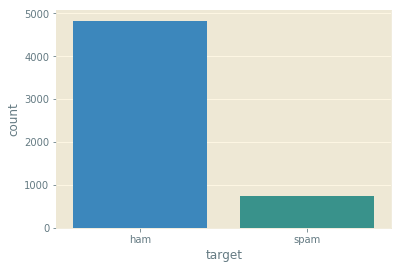

In [5]:
sns.countplot(x='target', data=df)

In [6]:
df.describe()

,target,sms
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later\r\n"
freq,4827,30


In [7]:
df.groupby('target').describe()

sms                                                               
       count unique                                                top freq
target                                                                     
ham     4827   4518                         Sorry, I'll call later\r\n   30
spam     747    653  Please call our customer service representativ...    4

In [8]:
df['length'] = df['sms'].apply(len)

In [9]:
df.head()

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",113
1,ham,Ok lar... Joking wif u oni...\r\n,31
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,157
3,ham,U dun say so early hor... U c already then say...,51
4,ham,"Nah I don't think he goes to usf, he lives aro...",63


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 250)

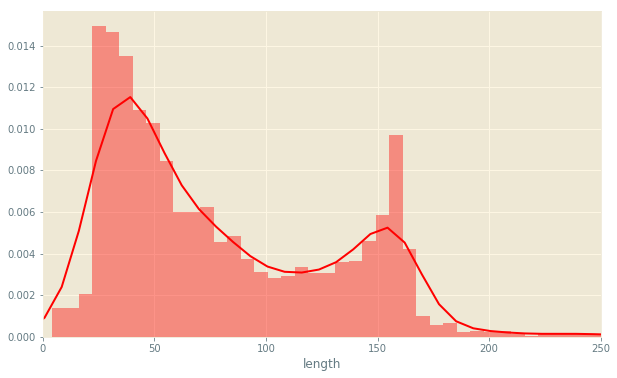

In [10]:
plt.figure(figsize=(10, 6))
sns.distplot(df['length'], bins=150, color='red')
plt.xlim(0, 250)

In [11]:
df['length'].describe()

count    5574.000000
mean       82.604593
std        59.919970
min         4.000000
25%        38.000000
50%        64.000000
75%       124.000000
max       912.000000
Name: length, dtype: float64

In [12]:
df[df['length'] == 912].iloc[0][1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..\r\n"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022022BFF588>,
      dtype=object)

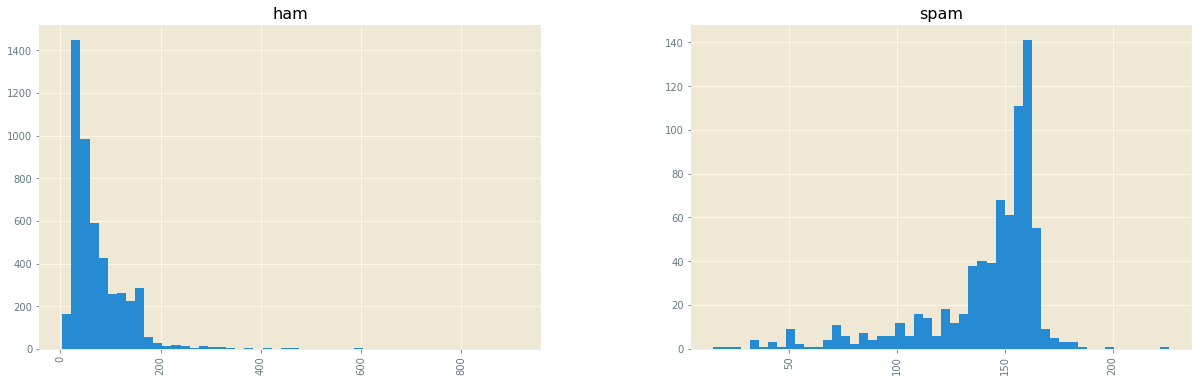

In [13]:
df.hist(column='length', by='target', bins=50, figsize=(20,6))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


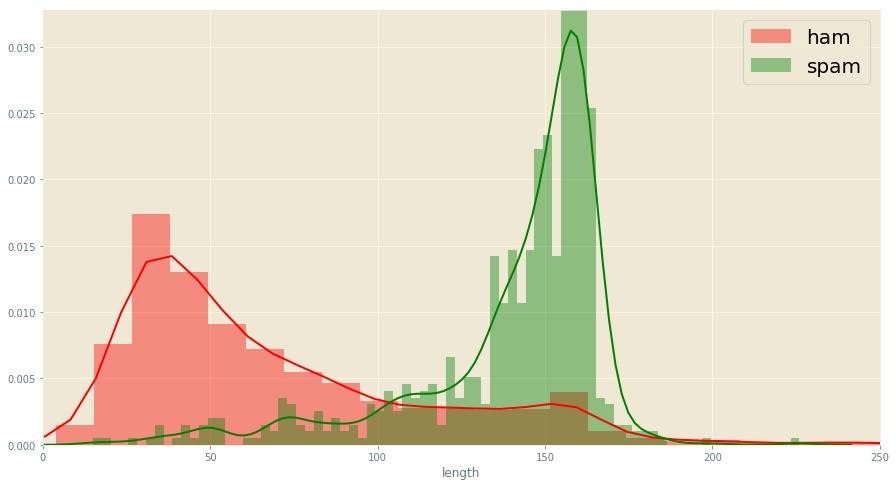

In [14]:
plt.figure(figsize=(15, 8))
sns.distplot(df[df['target'] == 'ham']['length'], bins=80, color='red')
sns.distplot(df[df['target'] == 'spam']['length'], bins=80, color='green')
plt.xlim(0, 250)
plt.legend(['ham', 'spam'], prop={'size': 20})

In [15]:
df = pd.get_dummies(df, columns=['target'], drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['sms'].values, df['target_spam'], test_size=0.25, random_state=42)

In [18]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(
                strip_accents='unicode',
                lowercase=True,
                tokenizer=porter.stem,
                token_pattern=r'\w{1,}',
                stop_words='english',
                ngram_range=(1, 1))

In [21]:
tfidf.fit(df['sms'].values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='\\w{1,}',
        tokenizer=<bound method PorterStemmer.stem of <PorterStemmer>>,
        use_idf=True, vocabulary=None)

In [22]:
X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()

In [25]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
test_predictions = clf.predict(X_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, test_predictions))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1203
          1       0.97      0.81      0.89       191

avg / total       0.97      0.97      0.97      1394



In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
nb = MultinomialNB()

In [31]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
test_predictions = nb.predict(X_test)

In [33]:
print(classification_report(y_test, test_predictions))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1203
          1       0.97      0.75      0.84       191

avg / total       0.96      0.96      0.96      1394



In [37]:
from sklearn.pipeline import Pipeline

In [38]:
tfidf = TfidfVectorizer(strip_accents='unicode',
                        lowercase=True,
                        analyzer='word',
                        token_pattern=r'\w{1,}')

In [39]:
steps = [('vect',tfidf), ('clf', LogisticRegression())]

In [40]:
tfidf_lr = Pipeline(steps=steps)

In [41]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = {'vect__stop_words':['english', None],
          'vect__ngram_range':[(1, 1), (1, 2)],
          'vect__min_df':[1, 5, 0.05],
          'vect__sublinear_tf':[True, False],
          'vect__tokenizer': [None, porter.stem],
          'clf__C':[0.1, 1.0, 10.0, 100.0],
          'clf__penalty':['l1', 'l2'] }

In [44]:
gs_tf_lr = GridSearchCV(tfidf_lr, param_grid=params, scoring='roc_auc', cv=4, n_jobs=12, verbose=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['sms'].values, df['target_spam'].values, test_size=0.25, random_state=42)

In [46]:
gs_tf_lr.fit(X_train, y_train)

Fitting 4 folds for each of 384 candidates, totalling 1536 fits


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   12.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:   26.3s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:   47.0s
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 1536 out of 1536 | elapsed:  1.7min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=12,
       param_grid={'vect__stop_words': ['english', None], 'vect__ngram_range': [(1, 1), (1, 2)], 'vect__min_df': [1, 5, 0.05], 'vect__sublinear_tf': [True, False], 'vect__tokenizer': [None, <bound method PorterStemmer.stem of <PorterStemmer>>], 'clf__C': [0.1, 1.0, 10.0, 100.0], 'clf__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [47]:
gs_tf_lr.best_score_

0.9963453078596726

In [48]:
gs_tf_lr.best_params_

{'clf__C': 10.0,
 'clf__penalty': 'l2',
 'vect__min_df': 5,
 'vect__ngram_range': (1, 2),
 'vect__stop_words': None,
 'vect__sublinear_tf': False,
 'vect__tokenizer': <bound method PorterStemmer.stem of <PorterStemmer>>}

In [49]:
gs_tf_lr.score(X_test, y_test)

0.9954520330935314

In [50]:
test_predictions = gs_tf_lr.predict(X_test)

In [51]:
print(classification_report(y_test, test_predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1203
          1       0.99      0.93      0.96       191

avg / total       0.99      0.99      0.99      1394

